In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, recall_score, precision_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)
from imblearn.over_sampling import SMOTE


# Load the dataset

Telco = pd.read_csv("/content/sample_data/Telco.csv")

# Display basic info
print(Telco.info())
print(Telco.head())

# Handle missing values (if any)
Telco = Telco.dropna()

# Convert categorical columns to numerical
label_encoders = {}
for col in Telco.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    Telco[col] = le.fit_transform(Telco[col])
    label_encoders[col] = le

# Define features and target variable
X = Telco.drop(columns=['Churn'])  # Assuming 'Churn' is the target
y = Telco['Churn']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and Regression Metrics
y_pred_reg = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Train Logistic Regression for classification
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions and Classification Metrics
y_pred_class = log_reg.predict(X_test)

recall = recall_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
Telco = Telco[Telco['TotalCharges'] != ' ']
Telco['TotalCharges'] = pd.to_numeric(Telco['TotalCharges'])

In [ ]:
numeric_cols = Telco.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col != 'SeniorCitizen']

object_columns = Telco.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f'{col}: {Telco[col].unique()}')

In [ ]:
label_encoders = {}
for col in Telco.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    Telco[col] = le.fit_transform(Telco[col])
    label_encoders[col] = le

In [ ]:
X = Telco.drop(columns=['Churn'])  # Assuming 'Churn' is the target
y = Telco['Churn']

<ipython-input-6-0e056bb20c35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


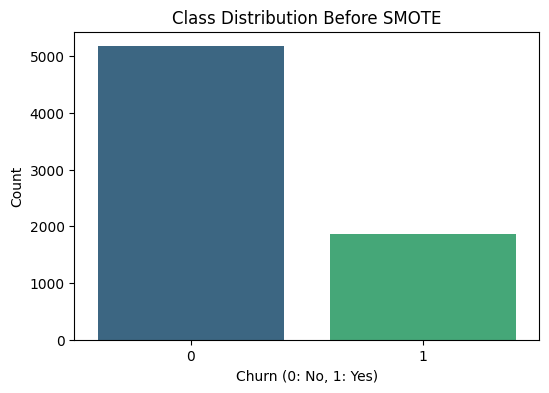

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="viridis")
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Churn (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


<ipython-input-8-290a4855f3ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="coolwarm")


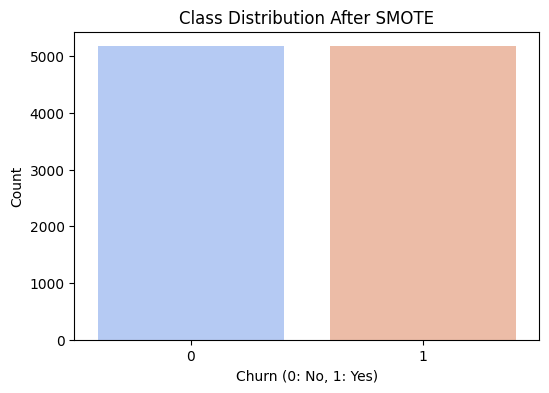

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled, palette="coolwarm")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Churn (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

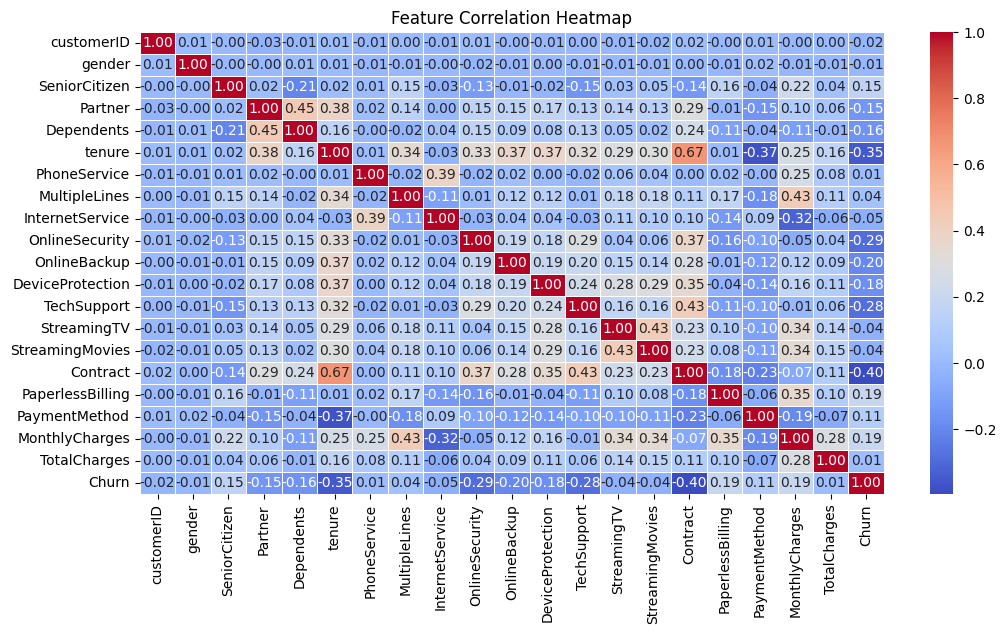

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(Telco.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt_model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.80
Recall: 0.79
Precision: 0.81
F1 Score: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1021
           1       0.81      0.79      0.80      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



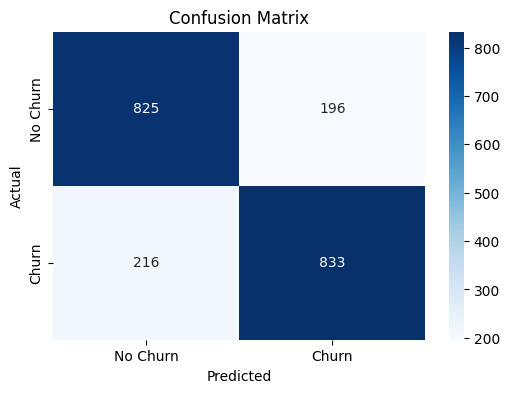

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Roc Curve
y_pred_prob = dt_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

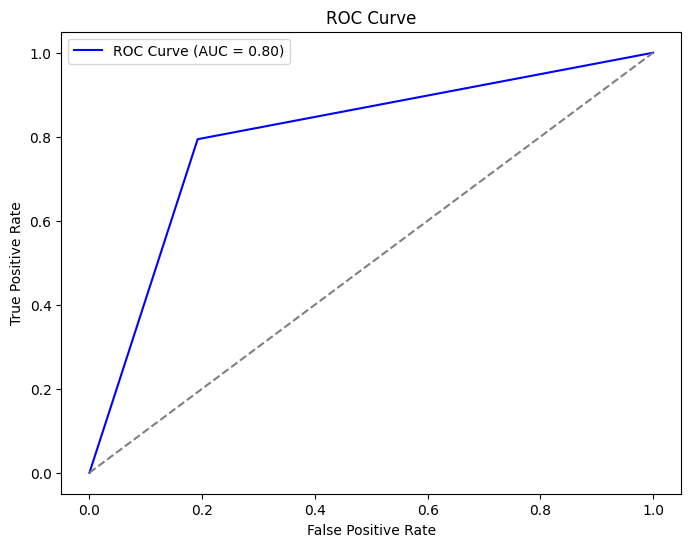

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
feature_importance = pd.Series(dt_model.feature_importances_, index=Telco.drop(columns=['Churn']).columns)
feature_importance = feature_importance.sort_values(ascending=False)



<ipython-input-24-bb032b3f160d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")


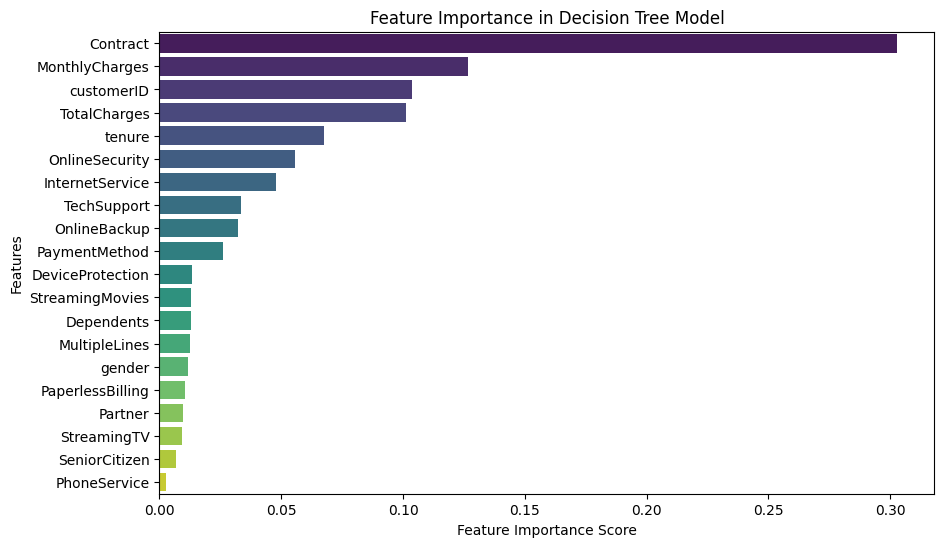

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree Model")
plt.show()

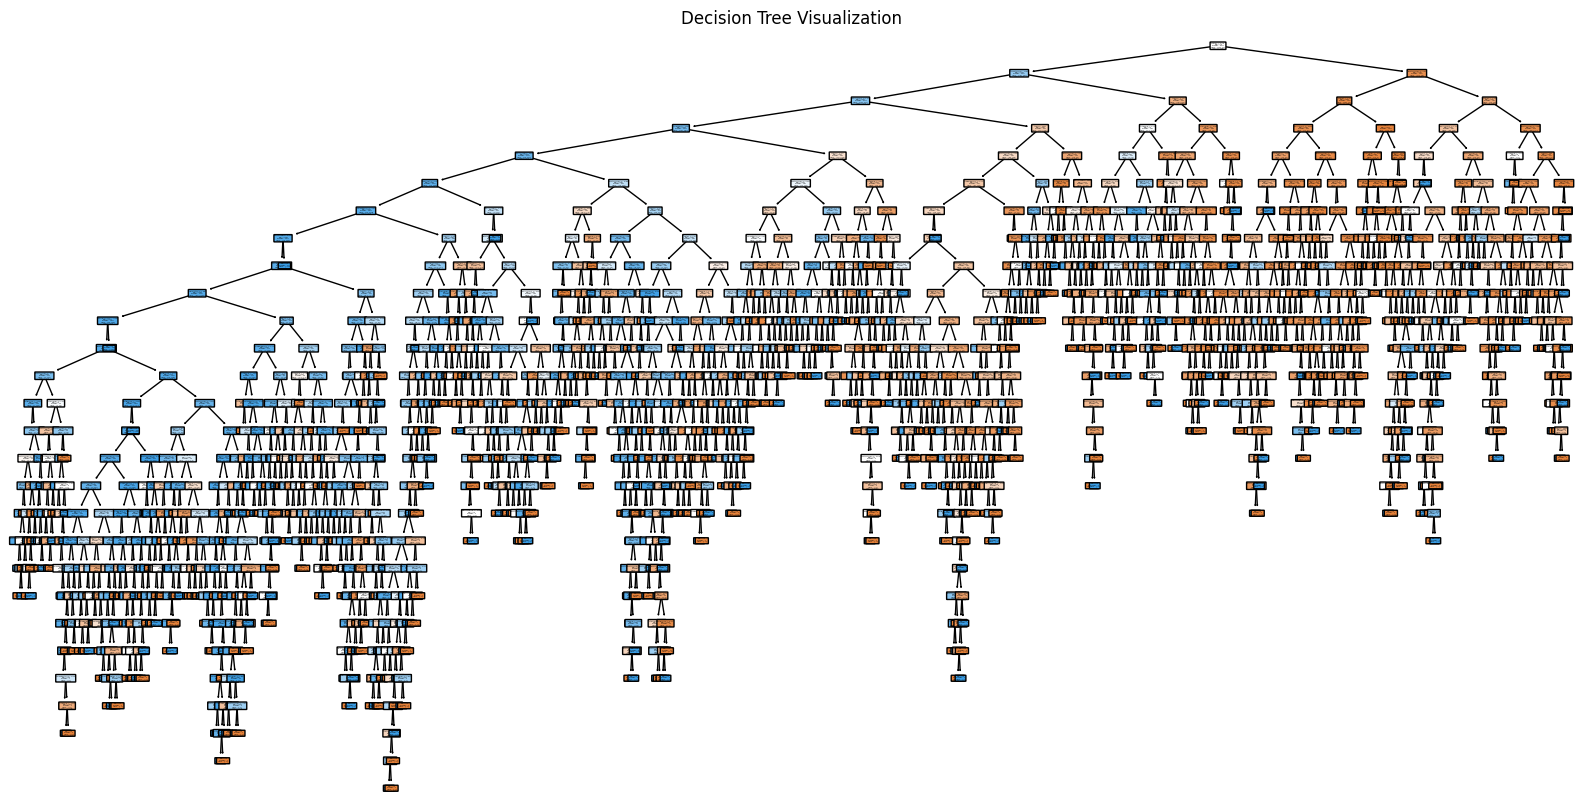

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=Telco.drop(columns=['Churn']).columns, class_names=["No Churn", "Churn"], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [ ]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
best_dt_model = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
best_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [ ]:
y_pred_optimized = best_dt_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)

In [ ]:

print(f"Optimized Decision Tree Accuracy: {optimized_accuracy:.2f}")


Optimized Decision Tree Accuracy: 0.82
